In [1]:

## Cargar librerías 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


[[1.00000000e+00 1.40277496e+02 1.96777759e+04 2.76034913e+06
  3.87214864e+08 5.43175315e+10 7.61952731e+12 1.06884821e+15
  1.49935351e+17 2.10325556e+19]
 [1.00000000e+00 1.38503494e+02 1.91832179e+04 2.65694270e+06
  3.67995847e+08 5.09687106e+10 7.05934450e+12 9.77743879e+14
  1.35420943e+17 1.87562738e+19]
 [1.00000000e+00 1.41311996e+02 1.99690802e+04 2.82187058e+06
  3.98764165e+08 5.63501600e+10 7.96295359e+12 1.12526087e+15
  1.59012859e+17 2.24704245e+19]
 [1.00000000e+00 1.41521500e+02 2.00283350e+04 2.83444001e+06
  4.01134201e+08 5.67691139e+10 8.03405015e+12 1.13699083e+15
  1.60908648e+17 2.27720332e+19]
 [1.00000000e+00 1.41949997e+02 2.01498016e+04 2.86026428e+06
  4.06014506e+08 5.76337580e+10 8.18111177e+12 1.16130879e+15
  1.64847779e+17 2.34001418e+19]
 [1.00000000e+00 1.43250000e+02 2.05205625e+04 2.93957058e+06
  4.21093485e+08 6.03216418e+10 8.64107518e+12 1.23783402e+15
  1.77319723e+17 2.54010504e+19]
 [1.00000000e+00 1.42644501e+02 2.03474537e+04 2.90245237e

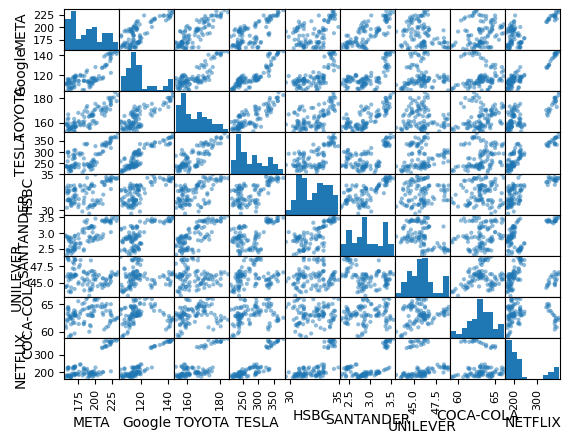

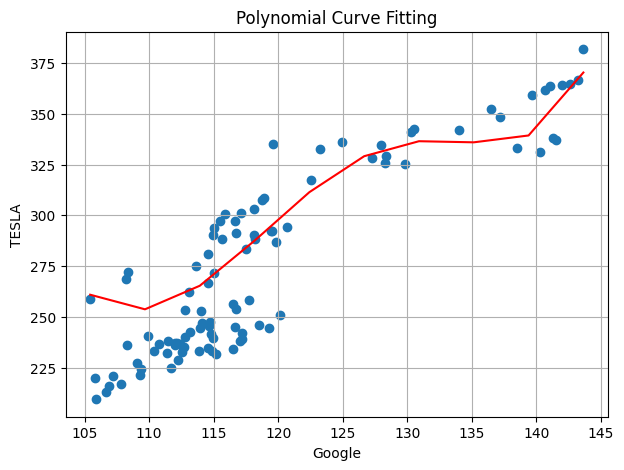

In [35]:
def GenerateX(X, nPoly): 
    # Generar la Xtrain
    X1 = np.ones(len(X))
    for n in range(1,nPoly+1): 
        X1 = np.append(X1 , X**n)
    X1 = X1.reshape(len(X), nPoly + 1, order = "F")
    return X1

def PolynomialFit(X,Y ,nPoly): 
    A = np.transpose(Xtrain) @ Xtrain #@ Sirve para multiplicar entre matrices 
    K = np.linalg.inv(A)
    B = K @ np.transpose(Xtrain) @ Y # coeficientes}
    return B

def PolynomialPredic(x_int, B): 
    Xtest = GenerateX(x_int, len(B) - 1)
    y_est = Xtest @B
    return y_est

#dataset 

sp = pd.read_excel("StockPrice.xlsx", sheet_name= "StockPrice")
sample = sp.iloc[0:99]

pd.plotting.scatter_matrix(sample)


X = sample.loc[:,"Google"]
Y = sample.loc[:,"TESLA"]

fig, ax = plt.subplots(figsize= (7,5))
ax.scatter(X,Y)
ax.grid()
ax.set_title("Polynomial Curve Fitting")
ax.set_xlabel("Google")
ax.set_ylabel("TESLA")


# Polynomial Regression
# Generar la Xtrain

nPoly = 9
Xtrain = GenerateX(X, nPoly)
print (Xtrain)
#Etapa de aprendizaje
B = PolynomialFit(X, Y, nPoly)
print(B)

## Etapa de consulta 
nsample = 10 
x_int = np.linspace(X.min(),X.max(), nsample)
y_est = PolynomialPredic(x_int, B)

ax.plot(x_int, y_est,color="red")

plt.show()